In [1]:
# necessery libraries
import pandas as pd
import sys
sys.path.insert(0,'../src/utils/')
import general_look_at_data as  GLAD
import cleaning_data as  CLD

In [2]:
import warnings
warnings.filterwarnings("ignore", message="elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison")

In [3]:
# data source must be updated to featsel folder rather than raw
data = pd.read_csv('../data/featsel/Citywide_Survey_featsel.csv')

# Handle Missing data

In [4]:
# Display missing percentages
feature_missing_stats = GLAD.get_feature_missing(data)
feature_missing_stats

,missing_count,missing_percentage,dont_know_percentage,no_response_percentage,technological_error_percentage,prefer_not_to_answer_percentage,not_required_percentage,feature_type
feature,,,,,,,,
school_park_amount_week,3342,0.998805,0.0,0.0,0.0,0.000000,0.000000,float64
work_park_amount_year,3342,0.998805,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_day,3340,0.998207,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_month,3339,0.997908,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_year,3339,0.997908,0.0,0.0,0.0,0.000000,0.000000,float64
...,...,...,...,...,...,...,...,...
school_bike_park,0,0.000000,0.0,0.0,0.0,0.000000,0.997908,int64
school_mode_bike,0,0.000000,0.0,0.0,0.0,0.000000,0.997908,int64
school_mode_taxi,0,0.000000,0.0,0.0,0.0,0.000000,0.998207,int64


## Handle Direct Missing Data

In [5]:
# Display the direct missing value, which is NaN, For each column with a percentage nonzero.
direct_missing = GLAD.display_direct_missing(feature_missing_stats)

# Display result
direct_missing

,missing_count,missing_percentage
feature,,
school_park_amount_week,3342,0.998805
work_park_amount_year,3342,0.998805
school_park_amount_day,3340,0.998207
school_park_amount_month,3339,0.997908
school_park_amount_year,3339,0.997908
work_park_amount_week,3334,0.996414
work_park_amount_month,3324,0.993425
work_park_amount_day,3322,0.992827
school_cms_zone,3224,0.963539


In [6]:
# Get the list of columns with more than 75% direct missing values
features_gt75_missing = CLD.filter_direct_missing_columns(direct_missing, None, 0.75)

# Display the feature list
features_gt75_missing

['school_park_amount_week',
 'work_park_amount_year',
 'school_park_amount_day',
 'school_park_amount_month',
 'school_park_amount_year',
 'work_park_amount_week',
 'work_park_amount_month',
 'work_park_amount_day',
 'school_cms_zone']

In [7]:
# Delete all features that has more than 75% of direct missing data
CLD.delete_columns(data, features_gt75_missing)

Current number of columns:  156
Updated number of columns:  147


In [8]:
# Update direct missing data percentages
feature_missing_stats = GLAD.get_feature_missing(data)

# Display the direct missing value, which is NaN, For each column with a percentage nonzero.
direct_missing = GLAD.display_direct_missing(feature_missing_stats)

In [9]:
# Get the list of columns with less than 75% direct missing values
features_st75_missing = CLD.filter_direct_missing_columns(direct_missing, None, 0)

# Display the feature list
features_st75_missing

['work_cms_zone']

In [10]:
# Fill in the columns with the column's mod value if the proportion of missing data is less than 75%
CLD.fill_by_mode(data, features_st75_missing)

'Provided column successfully filled by mode value.'

In [11]:
# Update direct missing data percentages
feature_missing_stats = GLAD.get_feature_missing(data)

# Display the direct missing value, which is NaN, For each column with a percentage nonzero.
direct_missing = GLAD.display_direct_missing(feature_missing_stats)

direct_missing

'No Missing Data: NAN type'

In [12]:
# Display final shape from this processing
data.shape

(3346, 147)

# Handle Indirect Missing Data

In [13]:
# Display the indirect missing value for each column with a percentage nonzero.
indirect_missing = GLAD.display_indirect_missing(feature_missing_stats)

# Display result
indirect_missing

,dont_know_percentage,no_response_percentage,prefer_not_to_answer_percentage,not_required_percentage,feature_type
feature,,,,,
license,0.0,0.041243,0.000000,0.000000,int64
tnc_purpose,0.0,0.000000,0.000000,0.409444,int64
car_share_none,0.0,0.027197,0.000000,0.000000,int64
car_share_other,0.0,0.027197,0.000000,0.000000,int64
car_share_enterprise,0.0,0.027197,0.000000,0.000000,int64
...,...,...,...,...,...
school_bike_park,0.0,0.000000,0.000000,0.997908,int64
school_mode_bike,0.0,0.000000,0.000000,0.997908,int64
school_mode_taxi,0.0,0.000000,0.000000,0.998207,int64


In [14]:
# Get the list of columns with more than 60% indirect missing values
features_gt60_missing = CLD.filter_indirect_missing_columns(indirect_missing, indirect_missing.columns, None, 0.6)

# Display the feature list
features_gt60_missing

['tnc_mode_scooter',
 'tnc_mode_bike',
 'tnc_mode_ferry',
 'tnc_mode_rail',
 'tnc_mode_bus',
 'tnc_mode_taxi',
 'tnc_mode_auto',
 'packages_distance',
 'lime_freq',
 'harassment_none',
 'harassment_other',
 'harassment_defense',
 'harassment_attention',
 'harassment_alone',
 'harassment_private_car',
 'harassment_neighborhood',
 'harassment_mode',
 'harassment_transit',
 'harassment_route',
 'harassment_time',
 'harassment_trip',
 'jump_freq',
 'work_mode_rail',
 'school_mode_auto',
 'school_vehicle_pass_period',
 'school_park_location',
 'school_mode_own',
 'school_mode',
 'kid_accompany',
 'school_type',
 'work_scooter_park',
 'work_mode_scooter',
 'work_bike_park',
 'work_mode_bike',
 'work_mode_taxi',
 'work_mode_ferry',
 'work_mode_bus',
 'school_mode_rail',
 'work_mode_auto',
 'work_vehicle_pass_period',
 'work_park_pay',
 'work_park_location',
 'work_mode_own',
 'school_mode_bus',
 'school_mode_ferry',
 'citi_bike_freq',
 'bike_purpose_other',
 'bike_purpose_appointment',
 'scho

In [15]:
# Delete all features that has more than 60% of indirect missing data
CLD.delete_columns(data, features_gt60_missing)

Current number of columns:  147
Updated number of columns:  87


In [16]:
# Update direct missing data percentages
feature_missing_stats = GLAD.get_feature_missing(data)

# Update the indirect missing values
indirect_missing = GLAD.display_indirect_missing(feature_missing_stats)

# Display result
indirect_missing

,no_response_percentage,prefer_not_to_answer_percentage,not_required_percentage,feature_type
feature,,,,
license,0.041243,0.000000,0.0000,int64
gender,0.000000,0.024208,0.0000,int64
tnc_use_juno,0.027496,0.000000,0.0000,int64
tnc_use_none,0.027496,0.000000,0.0000,int64
tnc_user,0.027496,0.000000,0.0000,int64
...,...,...,...,...
no_bike_share_stations,0.171847,0.000000,0.0263,int64
no_bike_share_personal_bike,0.171847,0.000000,0.0263,int64
no_bike_share_docks,0.171847,0.000000,0.0263,int64


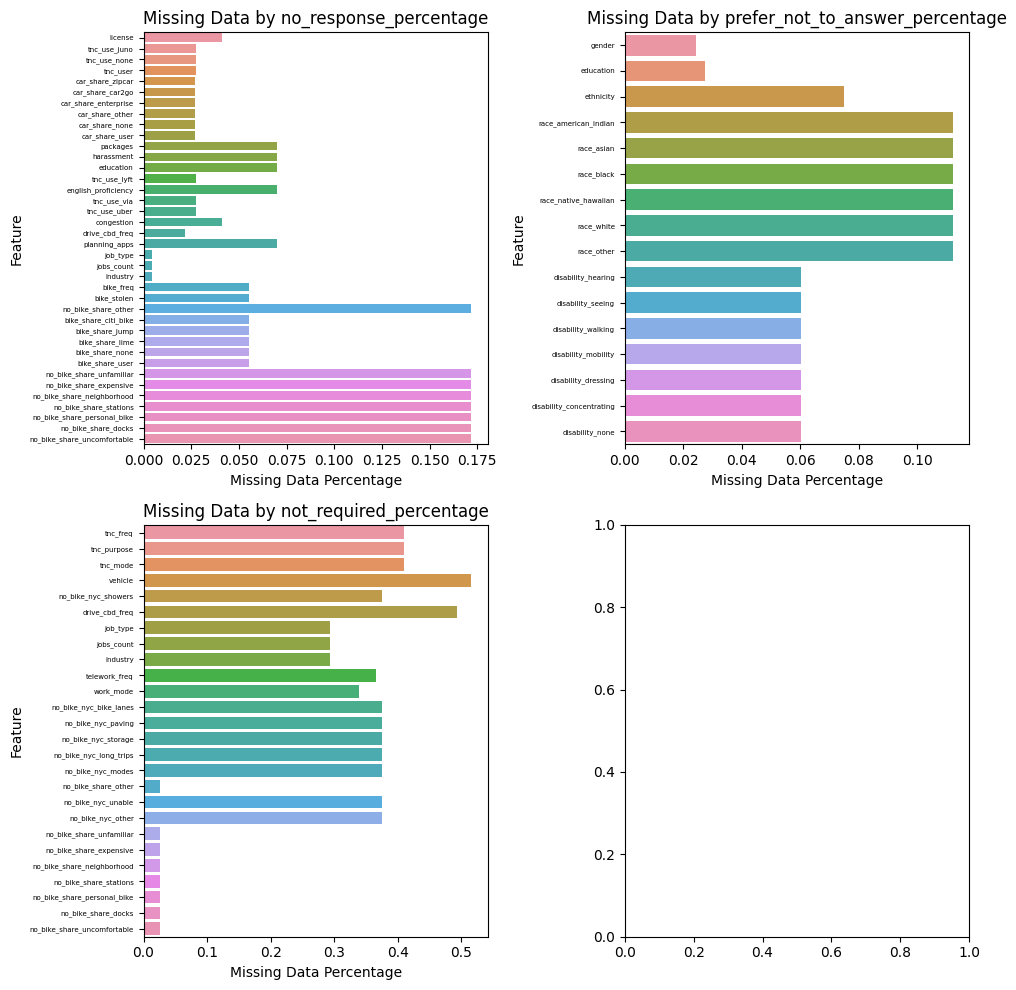

In [17]:
GLAD.plot_indirect_missing(indirect_missing)

In [18]:
# Get the list of columns with less than 60% indirect missing values
features_st60_missing = CLD.filter_indirect_missing_columns(indirect_missing, indirect_missing.columns ,0.0, 0.6)

# Display the feature list
features_st60_missing

['license',
 'gender',
 'tnc_use_juno',
 'tnc_use_none',
 'tnc_user',
 'tnc_freq',
 'tnc_purpose',
 'tnc_mode',
 'car_share_zipcar',
 'car_share_car2go',
 'car_share_enterprise',
 'car_share_other',
 'car_share_none',
 'car_share_user',
 'packages',
 'harassment',
 'education',
 'tnc_use_lyft',
 'english_proficiency',
 'ethnicity',
 'race_american_indian',
 'race_asian',
 'race_black',
 'race_native_hawaiian',
 'race_white',
 'race_other',
 'disability_hearing',
 'disability_seeing',
 'disability_walking',
 'disability_mobility',
 'disability_dressing',
 'disability_concentrating',
 'tnc_use_via',
 'tnc_use_uber',
 'vehicle',
 'no_bike_nyc_showers',
 'congestion',
 'drive_cbd_freq',
 'planning_apps',
 'job_type',
 'jobs_count',
 'industry',
 'telework_freq',
 'work_mode',
 'bike_freq',
 'bike_stolen',
 'no_bike_nyc_bike_lanes',
 'no_bike_nyc_paving',
 'no_bike_nyc_storage',
 'no_bike_nyc_long_trips',
 'no_bike_nyc_modes',
 'no_bike_share_other',
 'no_bike_nyc_unable',
 'no_bike_nyc_oth

## Seperate Types of Columns
which is: one-hot, numeric and labeled features.

In [19]:
one_hot_features, numeric_features, labeled_features = CLD.get_features_based_type(data, features_st60_missing)

Number of one-hot encoded features 40,
 Number of numeric features 0,
 Number of labeled features 7
Samples of one-hot encoded features


,license,tnc_use_juno,tnc_use_none,tnc_user,car_share_zipcar,car_share_car2go,car_share_enterprise,car_share_other,car_share_none,car_share_user,...,no_bike_nyc_long_trips,no_bike_nyc_modes,no_bike_nyc_unable,no_bike_nyc_other,bike_share_citi_bike,bike_share_jump,bike_share_lime,bike_share_none,bike_share_user,disability_none
1272,1,0,0,1,0,0,0,0,1,0,...,995,995,995,995,0,0,0,1,0,1
1064,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1616,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3249,0,0,0,1,0,0,0,0,1,0,...,995,995,995,995,0,0,0,1,0,1
766,1,0,0,1,0,0,0,0,1,0,...,995,995,995,995,0,0,0,1,0,1


Samples of numeric features


,english_proficiency,job_type,ethnicity,tnc_purpose,no_bike_share_uncomfortable,bike_freq,no_bike_share_stations,no_bike_share_neighborhood,tnc_mode,no_bike_share_personal_bike,...,vehicle,drive_cbd_freq,planning_apps,congestion,jobs_count,no_bike_share_other,gender,industry,tnc_freq,telework_freq
2209,1,1,1,7,1,5,1,0,106,0,...,995,995,4,2,1,0,2,15,6,7
2027,1,1,1,1,1,5,0,0,106,0,...,996,8,1,1,1,0,2,4,4,7
202,1,995,1,7,-9998,1,-9998,-9998,102,-9998,...,995,995,7,1,995,-9998,2,995,7,995
2385,1,995,999,995,0,6,0,0,995,0,...,995,995,8,4,995,1,2,995,995,995
308,1,1,997,2,0,5,0,1,102,0,...,996,6,4,4,1,0,1,18,4,8


Samples of labeled features


,english_proficiency,job_type,ethnicity,tnc_purpose,no_bike_share_uncomfortable,bike_freq,no_bike_share_stations,no_bike_share_neighborhood,tnc_mode,no_bike_share_personal_bike,...,vehicle,drive_cbd_freq,planning_apps,congestion,jobs_count,no_bike_share_other,gender,industry,tnc_freq,telework_freq
1357,-9998,995,1,7,1,5,0,1,105,0,...,995,995,4,-9998,995,0,2,995,7,995
2726,1,995,1,995,0,5,0,0,995,0,...,1,7,7,4,995,1,2,995,995,995
2235,1,1,1,1,1,5,0,1,105,0,...,995,995,4,2,1,0,1,8,6,8
1300,1,1,1,1,-9998,4,-9998,-9998,105,-9998,...,995,995,-9998,2,1,-9998,1,4,4,4
1056,1,1,1,1,0,5,0,0,100,0,...,2,7,2,4,2,0,2,8,7,8


In [20]:
# List of features with one-hot encoding errors
error_one_hot = ['no_bike_share_neighborhood', 'no_bike_share_stations', 'no_bike_share_personal_bike', 'no_bike_share_expensive', 'no_bike_share_other', 'no_bike_share_docks', 'no_bike_share_uncomfortable', 'no_bike_share_unfamiliar']

# Remove the error features from numeric_features and add them to one_hot_natural
labeled_features = list(set(labeled_features).symmetric_difference(set(error_one_hot)))
one_hot_features.extend(error_one_hot)

error_numeric_features = ['jobs_count']
# Remove the error features from labeled_features and add them to numeric_features
labeled_features = list(set(labeled_features).symmetric_difference(set(error_numeric_features)))
numeric_features.extend(error_numeric_features)

In [21]:
CLD.display_info_lists(data, "one-hot encoded", one_hot_features, "numeric", numeric_features, "labeled", labeled_features)

Number of one-hot encoded features 48,
 Number of numeric features 1,
 Number of labeled features 7
Samples of one-hot encoded features


,license,tnc_use_juno,tnc_use_none,tnc_user,car_share_zipcar,car_share_car2go,car_share_enterprise,car_share_other,car_share_none,car_share_user,...,bike_share_user,disability_none,no_bike_share_neighborhood,no_bike_share_stations,no_bike_share_personal_bike,no_bike_share_expensive,no_bike_share_other,no_bike_share_docks,no_bike_share_uncomfortable,no_bike_share_unfamiliar
85,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1695,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3160,0,0,1,0,0,0,0,0,1,0,...,0,999,0,0,0,0,1,0,0,0
605,1,0,0,1,0,0,0,0,1,0,...,1,1,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998
1178,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


Samples of numeric features


,english_proficiency,packages,harassment,job_type,ethnicity,tnc_purpose,education,work_mode,vehicle,drive_cbd_freq,planning_apps,congestion,gender,industry,bike_freq,tnc_freq,tnc_mode,telework_freq
844,1,3,4,995,1,995,6,995,995,995,4,1,1,995,5,995,995,995
1088,1,5,4,995,1,1,7,995,2,8,4,3,2,995,5,7,106,995
1301,1,1,4,1,1,995,6,105,1,7,5,2,2,1,5,995,995,5
11,1,1,4,1,1,5,6,105,995,995,4,2,2,5,5,7,106,8
667,2,1,4,3,1,1,6,995,995,995,4,5,2,9,5,7,105,995


Samples of labeled features


,english_proficiency,packages,harassment,job_type,ethnicity,tnc_purpose,education,work_mode,vehicle,drive_cbd_freq,planning_apps,congestion,gender,industry,bike_freq,tnc_freq,tnc_mode,telework_freq
1791,1,1,4,1,1,995,3,102,995,995,1,5,1,10,5,995,995,8
1605,1,1,4,1,1,995,7,105,2,8,4,1,1,14,2,995,995,8
1599,1,4,4,1,1,995,7,105,1,7,2,2,1,14,4,995,995,8
3176,1,2,4,995,1,995,3,995,995,995,8,2,1,995,5,995,995,995
1862,1,2,4,995,1,1,6,995,995,995,4,4,1,995,5,7,102,995


## Types of Indirect Missing Data for each Features

In [22]:
# Update indirect missing data percentages
search_numeric = GLAD.get_feature_missing(data[numeric_features])

# Update the indirect missing values
search_numeric = GLAD.display_indirect_missing(search_numeric)

# Display result
search_numeric.columns.drop('feature_type')

Index(['no_response_percentage', 'not_required_percentage'], dtype='object')

I will handle **not reuired** missing data type by **constant value which is zero**, and the **no response** missing data type by **impute statistical value**.

In [23]:
# Update indirect missing data percentages
search_encoded = GLAD.get_feature_missing(data[one_hot_features])

# Update the indirect missing values
search_encoded = GLAD.display_indirect_missing(search_encoded)

# Display result
search_encoded.columns.drop('feature_type')

Index(['no_response_percentage', 'prefer_not_to_answer_percentage',
       'not_required_percentage'],
      dtype='object')

I will handle **features that encoded** in nature by **create new column encode for each of the missing data type**.

In [24]:
# Update indirect missing data percentages
search_labeled = GLAD.get_feature_missing(data[labeled_features])

# Update the indirect missing values
search_labeled = GLAD.display_indirect_missing(search_labeled)

# Display result
search_labeled.columns.drop('feature_type')

Index(['no_response_percentage', 'prefer_not_to_answer_percentage',
       'not_required_percentage'],
      dtype='object')

I will handle **labeled data** by **encoding with missing data type**.

## Handle Numeric Data

In [25]:
# Fill numeric columns that have 995 and -9998 indirect missing label 
CLD.fill_numeric(data, numeric_features, [995, -9998])

In [26]:
data[numeric_features].value_counts()

jobs_count
1             2046
0              984
2              231
3               57
6               17
4                8
5                3
dtype: int64

# Handle Encoded Feature

In [27]:
# get name of encoded columns
encoded_columns_names = search_encoded.index

In [28]:
# list of prefixes of encoded features names
prefixes = ['license', 'tnc_user', 'tnc_use_', 'bike_', 'no_bike_nyc_', 'bike_share_', 'disability_', 'no_bike_share_', 'race_', 'no_bike_share_']

In [29]:
# dictionary to store each prefix with columnns name start with
encoded_columns_names_dict = {}

In [30]:
# call grouping_encoded_features function to grouping features withe same prefix (encoded from same feature)
encoded_columns_names_dict = CLD.grouping_encoded_features(prefixes, encoded_columns_names)

In [31]:
# print the dictionary content
encoded_columns_names_dict

{'license': ['license'],
 'tnc_user': ['tnc_user'],
 'tnc_use_': ['tnc_use_juno',
  'tnc_use_uber',
  'tnc_use_via',
  'tnc_use_none',
  'tnc_use_lyft'],
 'bike_': ['bike_stolen',
  'bike_share_citi_bike',
  'bike_share_jump',
  'bike_share_lime',
  'bike_share_none',
  'bike_share_user'],
 'no_bike_nyc_': ['no_bike_nyc_bike_lanes',
  'no_bike_nyc_paving',
  'no_bike_nyc_storage',
  'no_bike_nyc_long_trips',
  'no_bike_nyc_modes',
  'no_bike_nyc_unable',
  'no_bike_nyc_other',
  'no_bike_nyc_showers'],
 'bike_share_': ['bike_share_citi_bike',
  'bike_share_jump',
  'bike_share_lime',
  'bike_share_none',
  'bike_share_user'],
 'disability_': ['disability_none',
  'disability_concentrating',
  'disability_hearing',
  'disability_seeing',
  'disability_walking',
  'disability_mobility',
  'disability_dressing'],
 'no_bike_share_': ['no_bike_share_neighborhood',
  'no_bike_share_stations',
  'no_bike_share_personal_bike',
  'no_bike_share_expensive',
  'no_bike_share_other',
  'no_bike_sh

In [32]:
# missing-codes to handle it 
missing_codes = [-9998, 999, 995]

In [33]:
# handle missing-code data with function 
data = CLD.handle_missing_codes_encoded_features(data, prefixes, missing_codes, encoded_columns_names_dict)

In [34]:
# dicts to check if there is missing codes data not handled yet
indicies_9998={}
indicies_995={}
indicies_999={}

for prefix in prefixes:
    indicies_9998[prefix] = data[data[encoded_columns_names_dict[prefix][0]]==-9998].index.tolist()
    indicies_995[prefix] = data[data[encoded_columns_names_dict[prefix][0]]==995].index.tolist()
    indicies_999[prefix] = data[data[encoded_columns_names_dict[prefix][0]]==999].index.tolist()

In [35]:
print("the list of indicies of -9998 code in each group", indicies_9998)
print("the list of indicies of 999 code in each group", indicies_999)
print("the list of indicies of 999 code in each group", indicies_995)

the list of indicies of -9998 code in each group {'license': [], 'tnc_user': [], 'tnc_use_': [], 'bike_': [], 'no_bike_nyc_': [], 'bike_share_': [], 'disability_': [], 'no_bike_share_': [], 'race_': []}
the list of indicies of 999 code in each group {'license': [], 'tnc_user': [], 'tnc_use_': [], 'bike_': [], 'no_bike_nyc_': [], 'bike_share_': [], 'disability_': [], 'no_bike_share_': [], 'race_': []}
the list of indicies of 999 code in each group {'license': [], 'tnc_user': [], 'tnc_use_': [], 'bike_': [], 'no_bike_nyc_': [], 'bike_share_': [], 'disability_': [], 'no_bike_share_': [], 'race_': []}


### all lists are empty : Data is clean from missing codes

In [36]:
# share clean data 
data.to_csv("../data/featsel/Citywide_Survey_featsel.csv")